In [20]:
#  Mnist dataset reader
import numpy as np 
import struct
from array import array
from os.path  import join
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

class MnistDataloader(object):
    def __init__(self, training_images_filepath,training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath
    
    def read_images_labels(self, images_filepath, labels_filepath):        
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())        
        
        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())        
        images = []
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i][:] = img            
        
        return images, labels
            
    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train),(x_test, y_test)  
        
    def preprocess_data(self, x_train, y_train, x_test, y_test):
        x_train = np.array(x_train, dtype='float32') # vector (60000, 28, 28)
        x_test = np.array(x_test, dtype='float32') # vector (10000, 28, 28)
        y_train = np.array(y_train, dtype='int32') # vector (60000)
        y_test = np.array(y_test, dtype='int32') # vector (10000)
        
        x_train = x_train / 255.0
        x_test = x_test / 255.0

        x_train = x_train.reshape(x_train.shape[0], -1) # vector (60000, 784)
        x_test = x_test.reshape(x_test.shape[0], -1)
        
        def to_one_hot(y, num_classes=10): # one hot encoding
            return np.eye(num_classes)[y] 
        
        y_train_onehot = to_one_hot(y_train) # vector (60000, 10)
        y_test_onehot = to_one_hot(y_test) # vector (10000, 10)
        
        return x_train, y_train_onehot, x_test, y_test_onehot

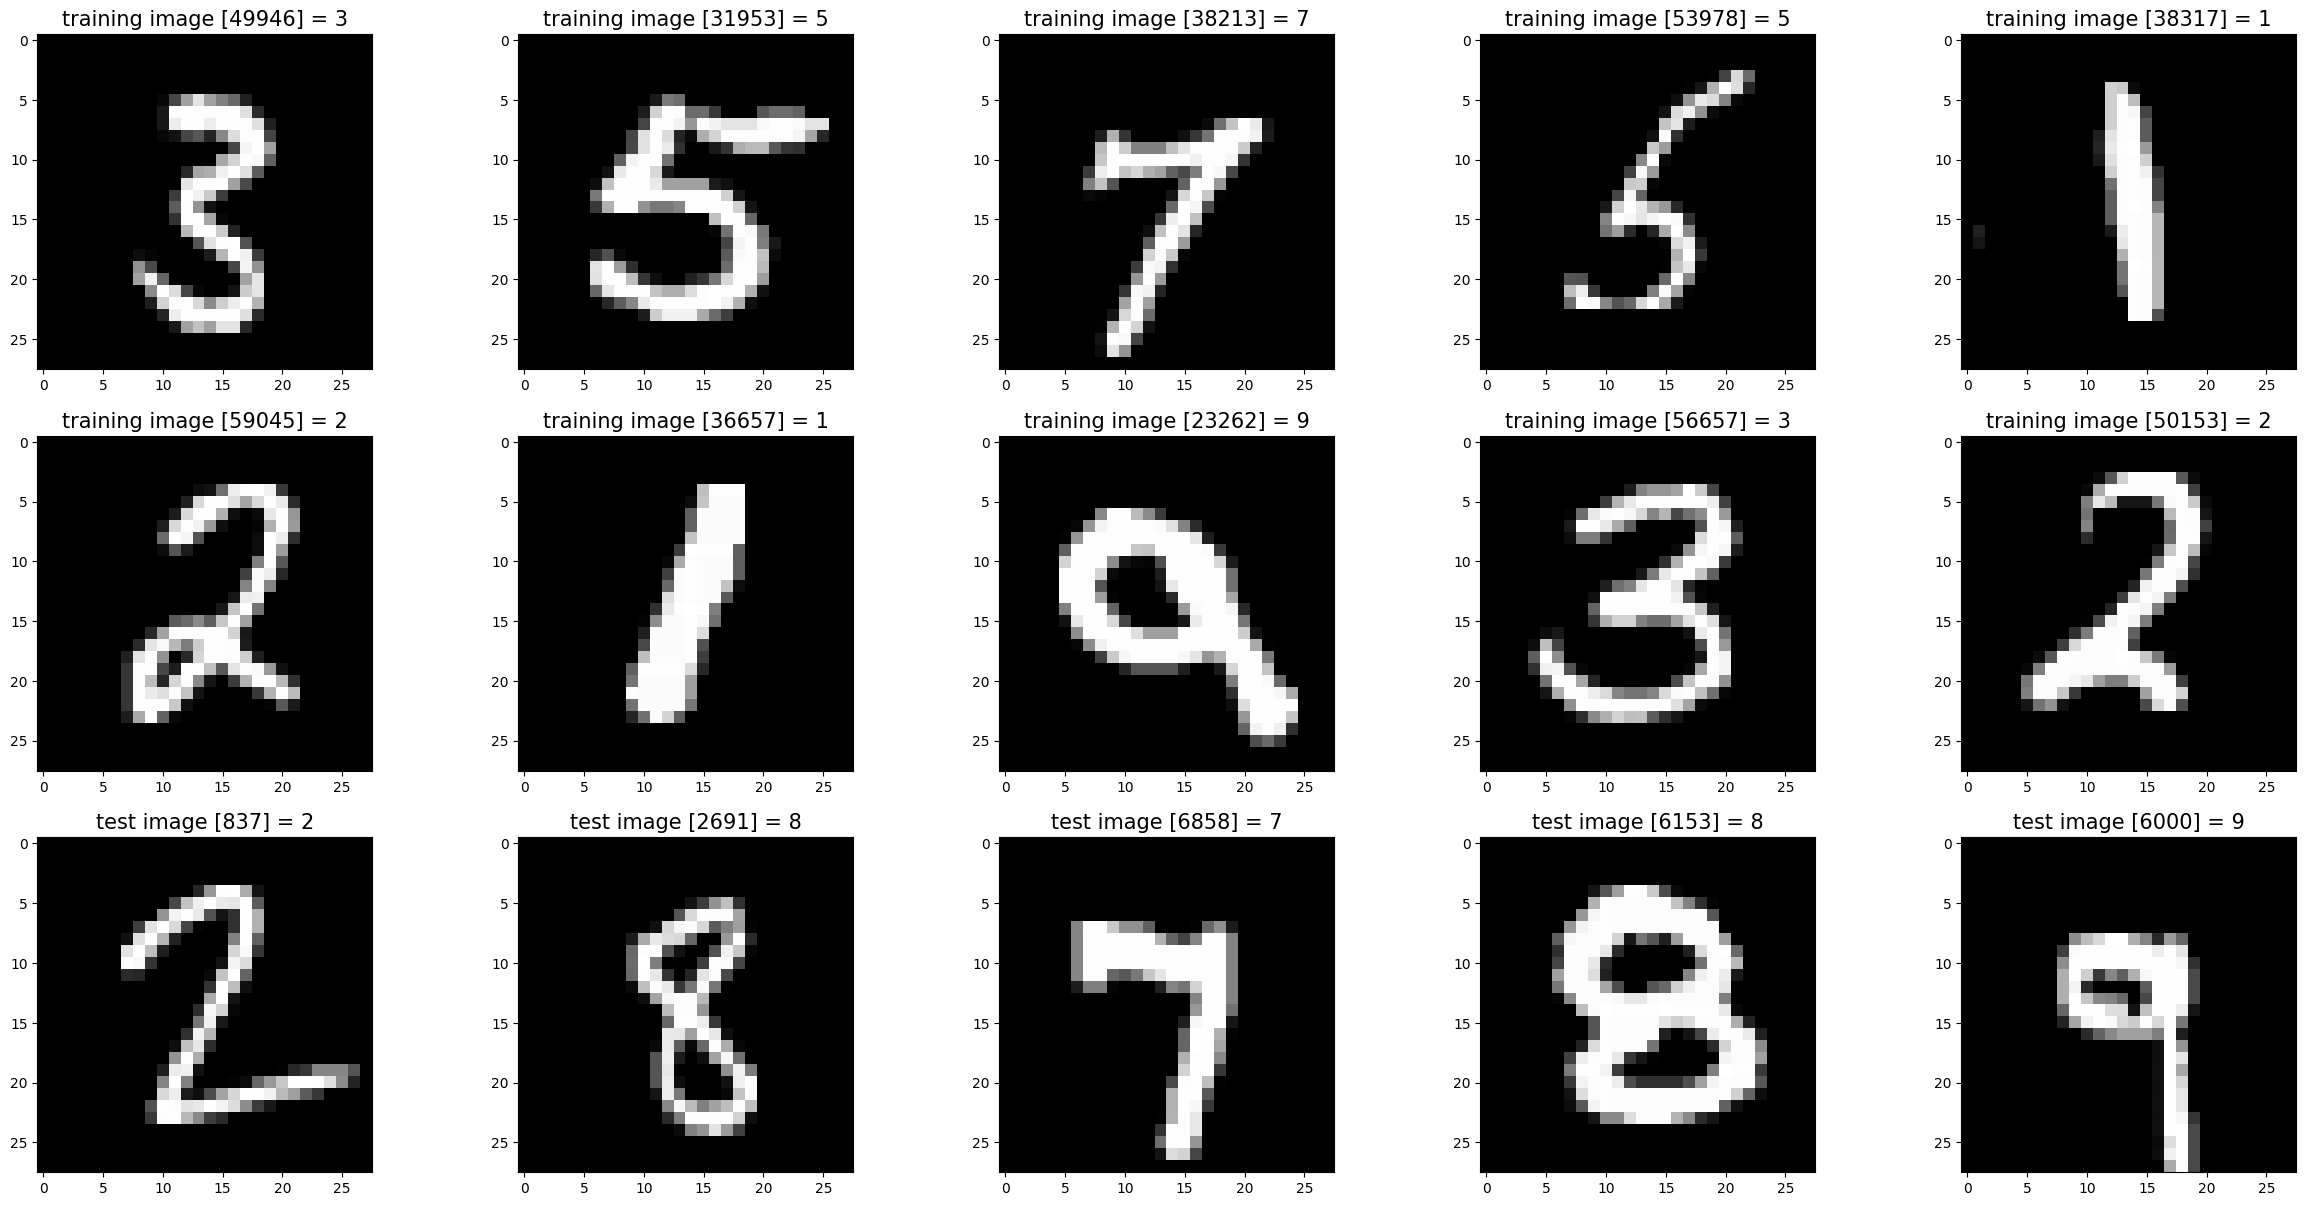

In [21]:
# Dataset verification
%matplotlib inline
import random

input_path = 'data'
training_images_filepath = join(input_path, 'train-images-idx3-ubyte/train-images-idx3-ubyte')
training_labels_filepath = join(input_path, 'train-labels-idx1-ubyte/train-labels-idx1-ubyte')
test_images_filepath = join(input_path, 't10k-images-idx3-ubyte/t10k-images-idx3-ubyte')
test_labels_filepath = join(input_path, 't10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte')

def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1

mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

images_2_show = []
titles_2_show = []
for i in range(0, 10):
    r = random.randint(1, 60000)
    images_2_show.append(x_train[r])
    titles_2_show.append('training image [' + str(r) + '] = ' + str(y_train[r]))    

for i in range(0, 5):
    r = random.randint(1, 10000)
    images_2_show.append(x_test[r])        
    titles_2_show.append('test image [' + str(r) + '] = ' + str(y_test[r]))    

show_images(images_2_show, titles_2_show)

In [22]:
class miniModel():
    def __init__(self):
        pass

    def initialize_parameters(self, input_size, hidden_size, output_size):
        np.random.seed(np.random.randint(1000))
        
        # 1. Uniform distribution
        # W1 = np.random.uniform(-1/np.sqrt(input_size), 1/np.sqrt(input_size), 
        #                        size=(hidden_size, input_size))
        # W2 = np.random.uniform(-1/np.sqrt(hidden_size), 1/np.sqrt(hidden_size), 
        #                        size=(output_size, hidden_size))
        
        # 2. Xavier Normal
        # W1 = np.random.randn(hidden_size, input_size) * np.sqrt(2.0/input_size)
        # W2 = np.random.randn(output_size, hidden_size) * np.sqrt(2.0/hidden_size)
        
        # 3. Xavier Uniform
        # W1 = np.random.uniform(-np.sqrt(6)/np.sqrt(input_size + hidden_size),
        #                       np.sqrt(6)/np.sqrt(input_size + hidden_size), 
        #                       size=(hidden_size, input_size))
        # W2 = np.random.uniform(-np.sqrt(6)/np.sqrt(hidden_size + output_size),
        #                       np.sqrt(6)/np.sqrt(hidden_size + output_size), 
        #                       size=(output_size, hidden_size))

        # 4. He uniform
        # W1 = np.random.uniform(-np.sqrt(6/input_size), np.sqrt(6/input_size), size = (hidden_size, input_size))
        # W2 = np.random.uniform(-np.sqrt(6/input_size), np.sqrt(6/input_size), size = (output_size, hidden_size))
        
        # 5. He normal
        W1 = np.random.randn(hidden_size, input_size) * np.sqrt(2/input_size)
        W2 = np.random.randn(output_size, hidden_size) * np.sqrt(2/input_size)
        
        b1 = np.zeros((1, hidden_size))
        b2 = np.zeros((1, output_size))
        
        return {"W1": W1, "b1": b1, "W2": W2, "b2": b2}

    def relu(self, x):
        return np.maximum(0, x)

    def softmax(self, x):
        exps = np.exp(x - np.max(x, axis = 1, keepdims=True))
        return exps/np.sum(exps, axis=1, keepdims=True)

    # Linear combination calculations
    # hiden layer activation z1 = W1 * X + b1 , ReLU a1 = ReLU(z1)
    # output layer activation z2 = W2 * a1 + b2, softmax a2 = softmax(z2)

    def forward_propagation(self, X, params):
        # Hidden Layer
        z1 = np.dot(X, params["W1"].T) + params["b1"]  
        a1 = self.relu(z1)
        
        # Output Layer
        z2 = np.dot(a1, params["W2"].T) + params["b2"] 
        a2 = self.softmax(z2)

        return {"z1":z1, "a1":a1, "z2":z2, "a2":a2}

    # Cross-Entropy loss function
    def compute_loss(self, y_true, y_pred):
        m = y_true.shape[0]
        return -np.sum(y_true * np.log(y_pred + 1e-15))/m

    # backward_propagation
    def backward_propagation(self, X, y_true, params, forward_cache):
        m = X.shape[0] # m = 64
        
        dz2 = forward_cache["a2"] - y_true   # (m, 10)
        dW2 = np.dot(forward_cache["a1"].T, dz2) / m  # (128, 10)
        db2 = np.sum(dz2, axis=0, keepdims=True) / m  # (10,)
        
        dz1 = np.dot(dz2, params["W2"]) * (forward_cache["z1"] > 0)  # (m, 128)
        dW1 = np.dot(X.T, dz1) / m   # (784, 128)
        db1 = np.sum(dz1, axis=0, keepdims=True) / m  # (128,)
        
        return {"dW1": dW1.T, "db1": db1, "dW2": dW2.T, "db2": db2}

    def update_parameters(self, params, grads, learning_rate=0.01):
        params["W1"] -= learning_rate * grads["dW1"]
        params["b1"] -= learning_rate * grads["db1"]
        params["W2"] -= learning_rate * grads["dW2"]
        params["b2"] -= learning_rate * grads["db2"]
        return params

    def show_loss_accuracy_graph(self, loss_accuracy_history, epochs):
        epochs_history = list(range(1, epochs+1))

        loss = [l[0] for l in loss_accuracy_history]
        accuracy = [a[1] for a in loss_accuracy_history]

        figure, axis = plt.subplots(2)

        axis[0].plot(epochs_history, loss, 'tab:green')
        axis[0].set_title(f"Loss over {epochs} epochs")
        axis[0].set_xticks(np.arange(1, 21, 1))
        axis[0].grid(True)
        axis[0].set(xlabel = "Epochs", ylabel = "Loss")

        axis[1].plot(epochs_history, accuracy)
        axis[1].set_title(f"Accuracy over {epochs} epochs")
        axis[1].set_xticks(np.arange(1, 21, 1))
        axis[1].grid(True)
        axis[1].set(xlabel = "Epochs", ylabel = "Accuracy")

        plt.savefig('charts/loss_accuracy.png')
        plt.tight_layout()
        plt.show()

    def train(self, X, y, params, epochs=10, batch_size=64, learning_rate=0.01):
        loss_accuracy_history = []
        
        for epoch in range(epochs):
            permutation = np.random.permutation(X.shape[0]) 
            X_shuffled = X[permutation] # shuffling test images from the dataset
            y_shuffled = y[permutation]
            
            # 1. Mini batch Stochastic gradient descent (fast)
            for i in range(0, X.shape[0], batch_size):
                X_batch = X_shuffled[i:i+batch_size]
                y_batch = y_shuffled[i:i+batch_size]
                
                cache = self.forward_propagation(X_batch, params)
                grads = self.backward_propagation(X_batch, y_batch, params, cache)
                params = self.update_parameters(params, grads, learning_rate)

            
            # 2. Stochastic gradient descent (slow, more accurate)
            # cache = self.forward_propagation(X_shuffled, params)
            # grads = self.backward_propagation(X_shuffled, y_shuffled, params, cache)
            # params = self.update_parameters(params, grads, learning_rate)
            
            cache = self.forward_propagation(X, params)
            loss = self.compute_loss(y, cache["a2"])
            predictions = np.argmax(cache["a2"], axis=1)
            accuracy = np.mean(predictions == np.argmax(y, axis=1))

            loss_accuracy_history.append([loss, accuracy])

            print(f"Epoch {epoch+1}/{epochs} | Loss: {loss:.4f} | Accuracy: {accuracy*100:.2f}%")
        
        self.show_loss_accuracy_graph(loss_accuracy_history, epochs)
        
        return params

    def evaluate(self, X_test, y_test, params):
        cache = self.forward_propagation(X_test, params)
        predictions = np.argmax(cache["a2"], axis=1)
        accuracy = np.mean(predictions == np.argmax(y_test, axis=1))
        print(f"Test Accuracy: {accuracy * 100:.2f}%")

Epoch 1/20 | Loss: 0.5913 | Accuracy: 85.74%
Epoch 2/20 | Loss: 0.4233 | Accuracy: 88.61%
Epoch 3/20 | Loss: 0.3657 | Accuracy: 89.74%
Epoch 4/20 | Loss: 0.3347 | Accuracy: 90.53%
Epoch 5/20 | Loss: 0.3133 | Accuracy: 91.17%
Epoch 6/20 | Loss: 0.2970 | Accuracy: 91.61%
Epoch 7/20 | Loss: 0.2821 | Accuracy: 92.03%
Epoch 8/20 | Loss: 0.2689 | Accuracy: 92.38%
Epoch 9/20 | Loss: 0.2580 | Accuracy: 92.64%
Epoch 10/20 | Loss: 0.2468 | Accuracy: 93.00%
Epoch 11/20 | Loss: 0.2372 | Accuracy: 93.32%
Epoch 12/20 | Loss: 0.2288 | Accuracy: 93.51%
Epoch 13/20 | Loss: 0.2202 | Accuracy: 93.75%
Epoch 14/20 | Loss: 0.2128 | Accuracy: 94.06%
Epoch 15/20 | Loss: 0.2053 | Accuracy: 94.22%
Epoch 16/20 | Loss: 0.1988 | Accuracy: 94.39%
Epoch 17/20 | Loss: 0.1926 | Accuracy: 94.57%
Epoch 18/20 | Loss: 0.1873 | Accuracy: 94.69%
Epoch 19/20 | Loss: 0.1821 | Accuracy: 94.83%
Epoch 20/20 | Loss: 0.1760 | Accuracy: 95.04%


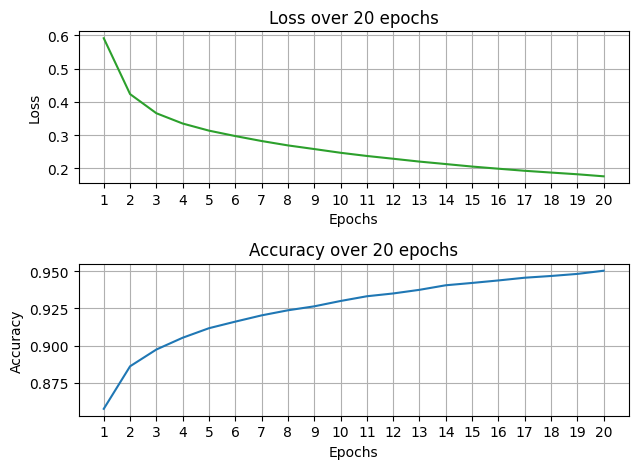

Test Accuracy: 94.78%


In [23]:
# ------------------ Training -------------------
input_path = 'data'
training_images_filepath = join(input_path, 'train-images-idx3-ubyte/train-images-idx3-ubyte')
training_labels_filepath = join(input_path, 'train-labels-idx1-ubyte/train-labels-idx1-ubyte')
test_images_filepath = join(input_path, 't10k-images-idx3-ubyte/t10k-images-idx3-ubyte')
test_labels_filepath = join(input_path, 't10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte')

mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()
x_train, y_train_onehot, x_test, y_test_onehot = mnist_dataloader.preprocess_data(x_train, y_train, x_test, y_test)

model = miniModel()
params = model.initialize_parameters(784, 128, 10)
params = model.train(x_train, y_train_onehot, params, epochs=20, batch_size=64, learning_rate=0.01)
model.evaluate(x_test, y_test_onehot, params)

In [25]:
# Quick test
sample_image = x_test[20] 
true_label = y_test[20]
predicted_digit = np.argmax(model.forward_propagation(sample_image.reshape(1, -1), params)["a2"])
print(f"Predicted: {predicted_digit}, True: {true_label}")

Predicted: 9, True: 9


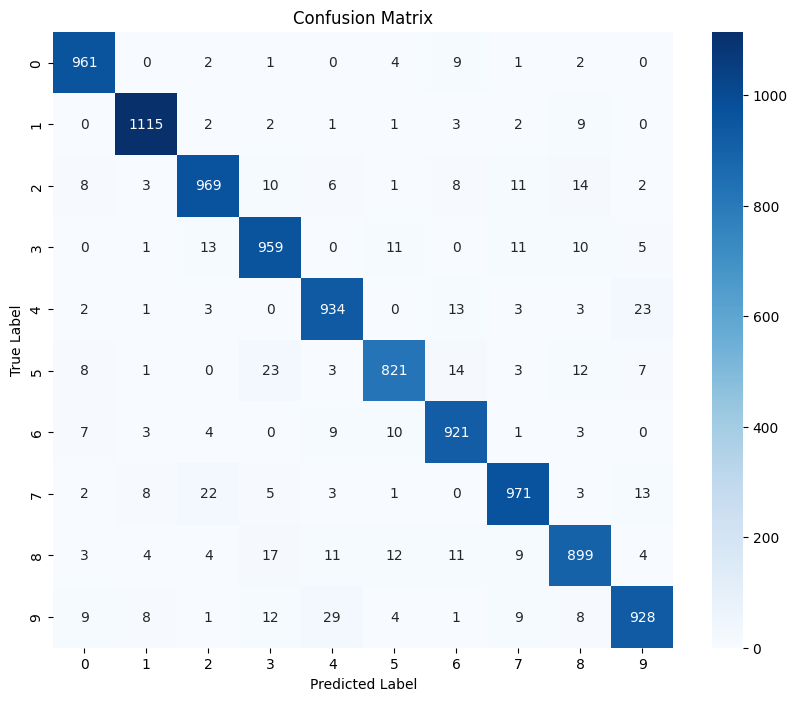

In [29]:
# More complex testing
cache_pred_true = []
for i in range(0, len(y_test)):
    sample_image = x_test[i]
    true_label = y_test[i]
    predicted_digit = np.argmax(model.forward_propagation(sample_image.reshape(1, -1), params)["a2"])
    cache_pred_true.append([int(predicted_digit), true_label])

y_pred = [pair[0] for pair in cache_pred_true]
y_true = [pair[1] for pair in cache_pred_true]

conf_matrix = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.savefig('charts/confusion_matrix.png')
plt.show()